In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 붓꽃 데이터 불러오기
df = pd.read_csv('iris.data', header=None)

X = df.iloc[0:100, [0, 2]].values         # 앞 100개 샘플의 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴

y = df.iloc[0:100, 4].values              # 앞 100개 샘플의 정답값(꽃종류) 을 가지고 옴
y = np.where(y == 'Iris-setosa', 0, 1)   # 값이 Iris-setosa이면 0, 아니면 1로 표기함

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
print("x.shape = ", X_std.shape, ", y.shape = ", y.shape)

x.shape =  (100, 2) , y.shape =  (100,)


In [3]:
W = np.random.rand(1,2)  
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.37441243 0.86386563]] , W.shape =  (1, 2) , b =  [0.18321576] , b.shape =  (1,)


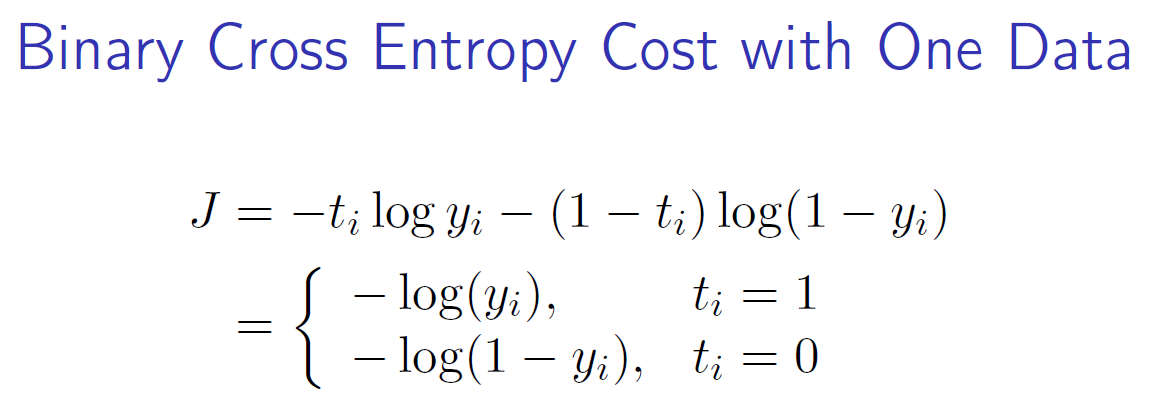

In [4]:
# 최종출력은 y = sigmoid(Wx+b) 이며, 손실함수는 cross-entropy 로 나타냄

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def loss_func(x, t):
    
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) ) 

In [5]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [6]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    delta = 1e-7    # log 무한대 발산 방지
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    # cross-entropy 
    return  -np.sum( t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta ) ) 

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    if y >= 0.5:
        result = 1  # True
    else:
        result = 0  # False
    
    return y, result

In [7]:
learning_rate = 1e-2  # 발산하는 경우, 1e-3 ~ 1e-6 등으로 바꾸어서 실행

f = lambda x : loss_func(x_data,t_data)  # f(x) = loss_func(x_data, t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in  range(10001):  
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 400 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, ", b = ",b )

Initial error value =  16.539615246674526 Initial W =  [[0.24074049]] 
 , b =  [0.97732743]
step =  0 error value =  11.256566637475201 W =  [[-0.15112129]] , b =  [0.98148434]
step =  400 error value =  2.8683377881474006 W =  [[0.27240015]] , b =  [-4.05326616]
step =  800 error value =  1.7913715512265722 W =  [[0.45142765]] , b =  [-5.61525634]
step =  1200 error value =  1.5223035171207158 W =  [[0.52923725]] , b =  [-6.65141023]
step =  1600 error value =  1.3553664865002537 W =  [[0.59075854]] , b =  [-7.46840938]
step =  2000 error value =  1.2381160302888912 W =  [[0.6424462]] , b =  [-8.15331079]
step =  2400 error value =  1.1494776730690062 W =  [[0.68746987]] , b =  [-8.7488453]
step =  2800 error value =  1.0791287702741297 W =  [[0.72763863]] , b =  [-9.27938008]
step =  3200 error value =  1.0213341375475669 W =  [[0.76409026]] , b =  [-9.76022414]
step =  3600 error value =  0.9726150484303496 W =  [[0.7975908]] , b =  [-10.20167309]
step =  4000 error value =  0.93072

In [8]:
(real_val, logical_val) = predict(3) 

print(real_val, logical_val)

[[1.12468997e-05]] 0


In [9]:
(real_val, logical_val) = predict(17) 

print(real_val, logical_val)

[[0.99127317]] 1
